In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Load the data
df = pd.read_csv('Datasets/iris.data', names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'class'])

In [4]:
# First look on the data loaded
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Check if there are missing values (there is not.)
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

In [6]:
# Explore the data
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
count         150.000000        150.000000         150.000000        150.000000
mean            5.843333          3.054000           3.758667          1.198667
std             0.828066          0.433594           1.764420          0.763161
min             4.300000          2.000000           1.000000          0.100000
25%             5.100000          2.800000           1.600000          0.300000
50%             5.80000

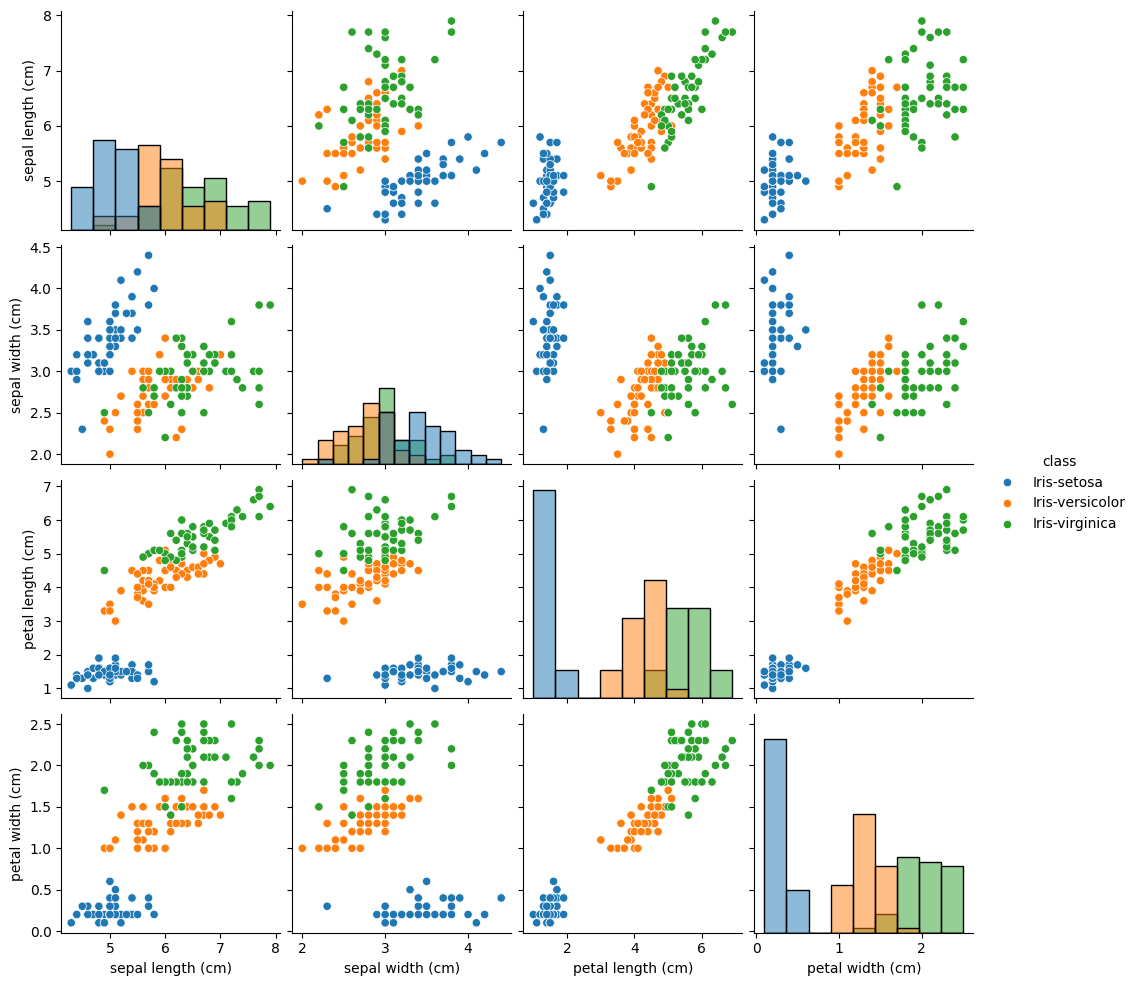

In [7]:
# Create a pairplot. As we can see petal width and petal length are good distinguishing features since their histograms do not overlap much.
sns.pairplot(df, hue='class', diag_kind='hist')

In [8]:
# Split the data into training, validation and test data. 
df = df.sample(frac=1, random_state=0).reset_index(drop=True)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

train_size = int(0.8*len(X))
val_size = int(0.1*len(X))

X_train = X[:train_size]
X_val = X[train_size:train_size+val_size]
X_test = X[train_size+val_size:]

y_train = y[:train_size]
y_val = y[train_size:train_size+val_size]
y_test = y[train_size+val_size:]

In [9]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [10]:
y_val_pred = model.predict(X_val)
print(accuracy_score(y_val, y_val_pred),)
print(classification_report(y_val, y_val_pred))
print(confusion_matrix(y_val, y_val_pred))

0.8666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      0.60      0.75         5
 Iris-virginica       0.71      1.00      0.83         5

       accuracy                           0.87        15
      macro avg       0.90      0.87      0.86        15
   weighted avg       0.90      0.87      0.86        15

[[5 0 0]
 [0 3 2]
 [0 0 5]]


In [11]:
model2 = RandomForestClassifier(random_state=2)
model2.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [13]:
y_val_pred2 = model2.predict(X_val)
print(accuracy_score(y_val, y_val_pred2),)
print(classification_report(y_val, y_val_pred2))
print(confusion_matrix(y_val, y_val_pred2))

0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      0.80      0.89         5
 Iris-virginica       0.83      1.00      0.91         5

       accuracy                           0.93        15
      macro avg       0.94      0.93      0.93        15
   weighted avg       0.94      0.93      0.93        15

[[5 0 0]
 [0 4 1]
 [0 0 5]]
